In [1]:
import numpy as np, pandas as pd
pd.pandas.set_option('display.max_columns',None)

In [2]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,fbeta_score,precision_score,auc,recall_score,roc_curve,precision_recall_curve

In [4]:
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
lr = LogisticRegression(solver='sag')
svc = SVC()
gnb = GaussianNB()
xgb = XGBClassifier()
dt = DecisionTreeClassifier()

In [4]:
X = pd.read_csv('Data/X_train_enc.csv')
y = pd.read_csv('Data/y_train_enc.csv')

X_test = pd.read_csv('Data/X_test_enc.csv')
y_test = pd.read_csv('Data/y_test_enc.csv')

In [9]:
models = [rfc,gbc,lr,svc,gnb,xgb,dt]
for m in models:
    print(m)
    m.fit(X,y['Attrition'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
         

D:\My_Installed_Soft\Anacondaa\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\My_Installed_Soft\Anacondaa\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
GaussianNB(priors=None, var_smoothing=1e-09)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=True,
              validate_parameters=None, verbosity=None)
[12:25

In [10]:
y_preds = dict()

for m in models:
    y_preds[m] = m.predict(X_test)

In [12]:
for m in models:
    print("\n ",m)
    print('Precision: ',precision_score(y_test,y_preds[m]))
    print('Recall: ',recall_score(y_test,y_preds[m]))
    print('F1: ',fbeta_score(y_test,y_preds[m],beta=1))
    print('Acc:',accuracy_score(y_test,y_preds[m]))
    print(confusion_matrix(y_test,y_preds[m]))
    


  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Precision:  0.7857142857142857
Recall:  0.15492957746478872
F1:  0.2588235294117647
Acc: 0.8571428571428571
[[367   3]
 [ 60  11]]

  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
               

D:\My_Installed_Soft\Anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy list
- RF   -- 86
- ADA  -- 80
- GB   -- 87
- LR   -- 83
- SVC  -- 83
- GNB  -- 79
- XGB  -- 86
- DT   -- 76

In [5]:
import pickle

In [6]:
stk1 = pickle.load(open('Test2/stk_final3','rb'))
stk2 = pickle.load(open('Test2/stk_final3_best_accuracy','rb'))

D:\My_Installed_Soft\Anacondaa\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
D:\My_Installed_Soft\Anacondaa\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
D:\My_Installed_Soft\Anacondaa\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
D:\My_Installed_Soft\Anacondaa\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.24.2. This mig

In [7]:
y_pred1 = stk1.predict(X_test)
y_pred2 = stk2.predict(X_test)

In [9]:
print('Precision: ',precision_score(y_test,y_pred1))
print('Recall: ',recall_score(y_test,y_pred1))
print('F1: ',fbeta_score(y_test,y_pred1,beta=1))
print('Acc:',accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

Precision:  0.639344262295082
Recall:  0.5492957746478874
F1:  0.5909090909090909
Acc: 0.8775510204081632
[[348  22]
 [ 32  39]]


In [10]:
print('Precision: ',precision_score(y_test,y_pred2))
print('Recall: ',recall_score(y_test,y_pred2))
print('F1: ',fbeta_score(y_test,y_pred2,beta=1))
print('Acc:',accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

Precision:  0.7254901960784313
Recall:  0.5211267605633803
F1:  0.6065573770491803
Acc: 0.891156462585034
[[356  14]
 [ 34  37]]


In [11]:
import scikitplot as skplt
import matplotlib.pyplot as plt

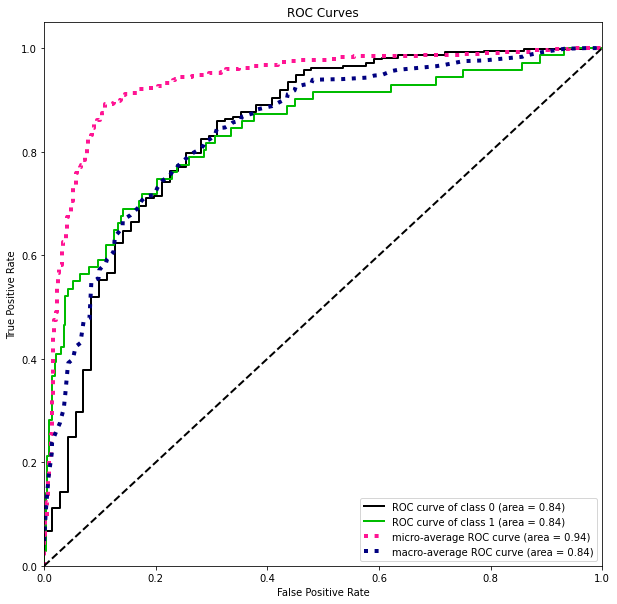

In [25]:
y_true = y_test
y_probas = stk2.predict_proba(X_test)
skplt.metrics.plot_roc(y_true, y_probas,figsize=(10,10))
plt.show()

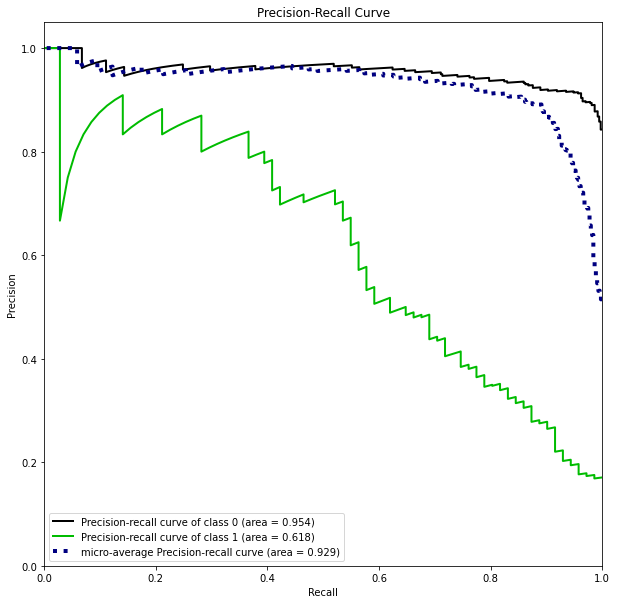

In [24]:
skplt.metrics.plot_precision_recall(y_true,y_probas,figsize=(10,10))

In [16]:
y_pred = stk.predict(X_test)


print('Acc:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Acc: 0.891156462585034
[[356  14]
 [ 34  37]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       370
           1       0.73      0.52      0.61        71

    accuracy                           0.89       441
   macro avg       0.82      0.74      0.77       441
weighted avg       0.88      0.89      0.88       441

